# UoG-DA_Group28 Jupyter Notebook: Evaluation - Classification

<hr>

## <u> Initial Setup </u>

From our model training, we've observed that the dataset combinations that provided the most optimal model for the different classification types are as follows:

|          | Decision Tree | Neural Network | K-Nearest Neighbour |
|:--------:|:--------:|:--------:|:--------:|
|   CIR    |   Agg    |   PCA    |   Agg    |
|  Split   |  70:30   |  80:20   |  80:20   |

While not optimal, for the sake of standardization, we will settle on utilizing a common dataset of `cir_ncir_agg` with a `80:20` split and the models that were trained using this dataset when performing our evaluation. 

In [10]:
from utils import *

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score

# load the Datasets
dataset = load_from_pickle("cir_ncir_agg.pkl", "./pickled_data_sets")

# load the models
dt = load_from_pickle("dt_cir_ncir_agg_80_20.pkl", "./pickled_models")
nn = load_from_pickle("nn_cir_ncir_agg_80_20.pkl", "./pickled_models")
knn = load_from_pickle("knn_cir_ncir_agg_80_20.pkl", "./pickled_models")

# Select the features to be used for Classification
X = dataset.drop(columns = 'NLOS')
Y = dataset[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Create the Training and Test set with split 70:30 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

## <u> Training & Testing Accuracy and F1 score between Classifiers </u>

We will first look to compare the accuracy of each classifier, keeping in mind that only nn is using it's most optimal dataset

In [11]:
training_accuracy = []
testing_accuracy = []

dt_y_train_predict = dt.predict(x_train)
dt_y_test_predict = dt.predict(x_test)
training_accuracy.append(accuracy_score(y_train, dt_y_train_predict))
testing_accuracy.append(accuracy_score(y_test, dt_y_test_predict))

nn_y_train_predict = nn.predict(x_train)
nn_y_test_predict = nn.predict(x_test)
training_accuracy.append(accuracy_score(y_train, nn_y_train_predict))
testing_accuracy.append(accuracy_score(y_test, nn_y_test_predict))

knn_y_train_predict = knn.predict(x_train)
knn_y_test_predict = knn.predict(x_test)
training_accuracy.append(accuracy_score(y_train, knn_y_train_predict))
testing_accuracy.append(accuracy_score(y_test, knn_y_test_predict))

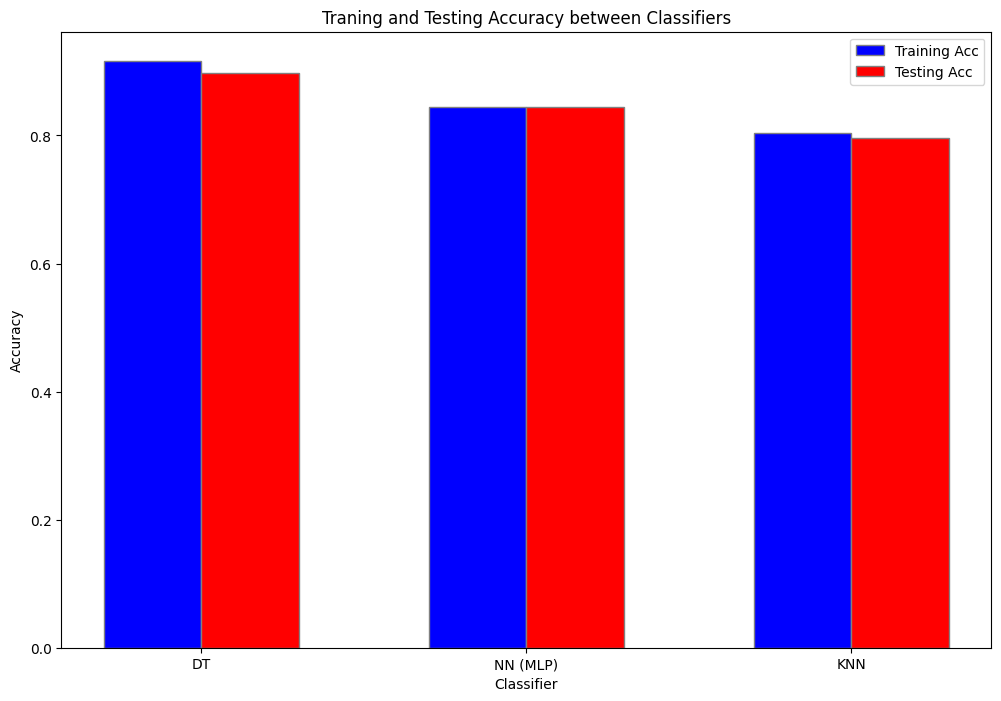

In [12]:
barWidth = 0.30
fig = plt.subplots(figsize = (12, 8)) 
 
# Set position of bar on X axis 
br1 = np.arange(len(training_accuracy)) 
br2 = [x + barWidth for x in br1] 
 
# Make the plot
plt.bar(br1, training_accuracy, color ='blue', width = barWidth, 
        edgecolor ='grey', label ='Training Acc') 
plt.bar(br2, testing_accuracy, color ='red', width = barWidth, 
        edgecolor ='grey', label ='Testing Acc') 
 
# Adding Xticks 
plt.xlabel('Classifier') 
plt.ylabel('Accuracy') 
plt.xticks([r + 0.15 for r in range(len(training_accuracy))], 
        ['DT', 'NN (MLP)', 'KNN'])
plt.title("Traning and Testing Accuracy between Classifiers")
 
plt.legend()
plt.show() 

Next we will look to compare the F1 score of each classifier as this will account for any dataset imbalances by factoring precision and recall values into the equation, keeping in mind that only nn is using it's most optimal dataset

In [13]:
svm_train_f1_score = f1_score(y_train, dt_y_train_predict)
svm_test_f1_score = f1_score(y_test, dt_y_test_predict)

mlp_train_f1_score = f1_score(y_train, nn_y_train_predict)
mlp_test_f1_score = f1_score(y_test, nn_y_test_predict)

rf_train_f1_score = f1_score(y_train, knn_y_train_predict)
rf_test_f1_score = f1_score(y_test, knn_y_test_predict)

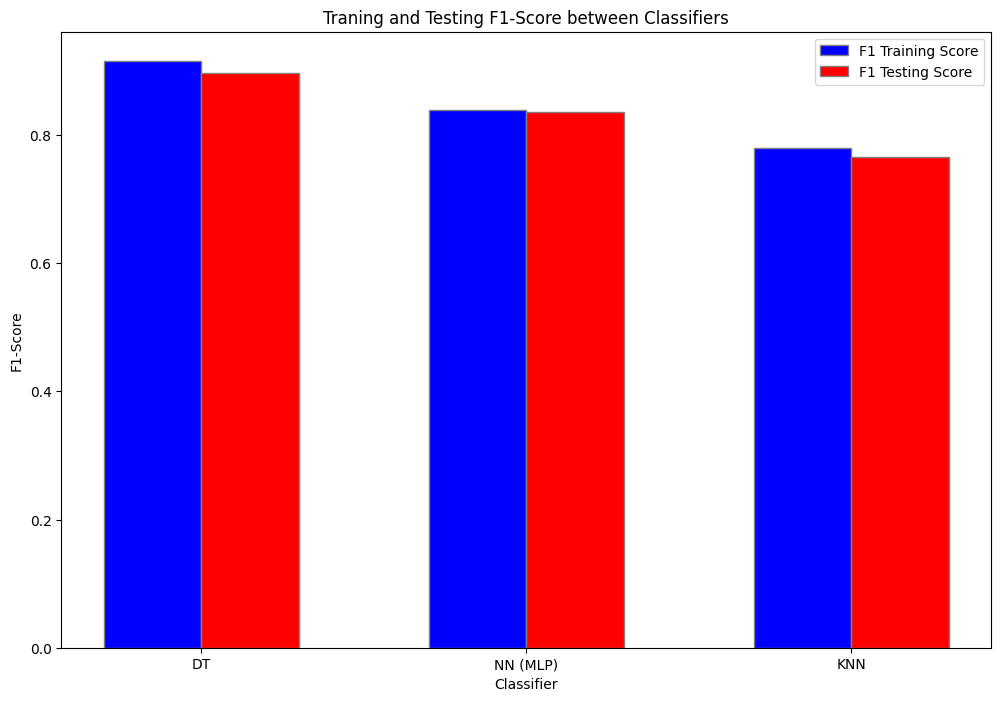

In [14]:
barWidth = 0.30
fig = plt.subplots(figsize = (12, 8)) 
 
# Set position of bar on X axis 
br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 
 
# Make the plot
plt.bar(br1, [svm_train_f1_score, mlp_train_f1_score, rf_train_f1_score], color ='blue', width = barWidth, 
        edgecolor ='grey', label ='F1 Training Score') 
plt.bar(br2, [svm_test_f1_score, mlp_test_f1_score, rf_test_f1_score], color ='red', width = barWidth, 
        edgecolor ='grey', label ='F1 Testing Score') 
 
# Adding Xticks 
plt.xlabel('Classifier') 
plt.ylabel('F1-Score') 
plt.xticks([r + 0.15 for r in range(3)], 
        ['DT', 'NN (MLP)', 'KNN'])
plt.title("Traning and Testing F1-Score between Classifiers")
 
plt.legend()
plt.show() 

## <u> Conclusion </u>

From both the Accuracy and F1 scores we can see that the Decision Tree model trained using the dataset of `cir_ncir_agg` with a `80:20` split produces the best results 

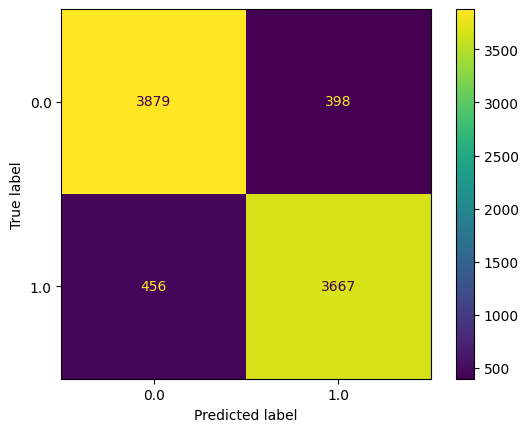

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      4277
         1.0       0.90      0.89      0.90      4123

    accuracy                           0.90      8400
   macro avg       0.90      0.90      0.90      8400
weighted avg       0.90      0.90      0.90      8400



In [15]:
cm = confusion_matrix(y_test, dt_y_test_predict, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt.classes_)
disp.plot()
plt.show()

report = classification_report(y_test, dt_y_test_predict)
print(report)